### README:请按照顺序运行! ###

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 设置全局字体为支持中文的字体，为 'SimHei'（黑体）  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体  
plt.rcParams['axes.unicode_minus'] = False
data=pd.read_csv('credit_risk_dataset.csv')

print(data.head(5)) #输出数据前十行


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y             

In [117]:
# 展示数据的基本信息
print(data.info())

# 展示数据的描述性统计
print(data.describe())

# 检查缺失值
print("数据中缺失值情况：")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB
None
         person_age  person_income  person_emp_length     loan_amnt  \
count  32581

#####  接下来进行数据清洗/预处理  #####

In [103]:
# 检查重复值
print("删除重复值之前，重复值个数：",data.duplicated().sum())

# 删除重复值
data.drop_duplicates(inplace=True)
print("删除重复值之后，重复值个数：",data.duplicated().sum())
print("\n")

删除重复值之前，重复值个数： 165
删除重复值之后，重复值个数： 0




In [104]:
# 找出就业年限大于年龄的记录
invalid_data = data[data['person_emp_length'] > data['person_age']]

# 输出符合条件的数据记录
invalid_data_count = invalid_data.shape[0]
print(invalid_data)

#剔除不符合逻辑的记录
data.drop([0, 210], inplace=True)

     person_age  person_income person_home_ownership  person_emp_length  \
0            22          59000                  RENT              123.0   
210          21         192000              MORTGAGE              123.0   

    loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0      PERSONAL      35000          16.02            1                 0.59   
210     VENTURE      20000           6.54            0                 0.10   

    cb_person_default_on_file  cb_person_cred_hist_length  
0                           Y                           3  
210                         N                           4  


In [105]:
# 剔除 person_age 不在合理范围（18 到 100）内的记录
data = data[(data['person_age'] >= 18) & (data['person_age'] <= 100)]

# 剔除 person_emp_length 不在合理范围（0 到 50）内的记录
data = data[(data['person_emp_length'] >= 0) & (data['person_emp_length'] <= 50)]

# 找出贷款利率不在 0 到 20 范围内的记录
invalid_loan_int_rate = data[(data['loan_int_rate'] < 0) | (data['loan_int_rate'] > 20)]

# 输出不在合理范围内的贷款利率数据
print("贷款利率不在合理范围内的数据个数：",invalid_loan_int_rate.shape[0])

# 剔除贷款利率不在 0 到 20 范围内的记录
data = data[(data['loan_int_rate'] >= 0) & (data['loan_int_rate'] <= 20)]


贷款利率不在合理范围内的数据个数： 73


In [106]:
# 检查缺失值
print("数据中缺失值情况：")
print(data.isnull().sum())

数据中缺失值情况：
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [107]:
# 展示数据的基本信息
print(data.info())

# 展示数据的描述性统计
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 28422 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28422 non-null  int64  
 1   person_income               28422 non-null  int64  
 2   person_home_ownership       28422 non-null  object 
 3   person_emp_length           28422 non-null  float64
 4   loan_intent                 28422 non-null  object 
 5   loan_amnt                   28422 non-null  int64  
 6   loan_int_rate               28422 non-null  float64
 7   loan_status                 28422 non-null  int64  
 8   loan_percent_income         28422 non-null  float64
 9   cb_person_default_on_file   28422 non-null  object 
 10  cb_person_cred_hist_length  28422 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.6+ MB
None
         person_age  person_income  person_emp_length     loan_amnt  \
count  28422.0000

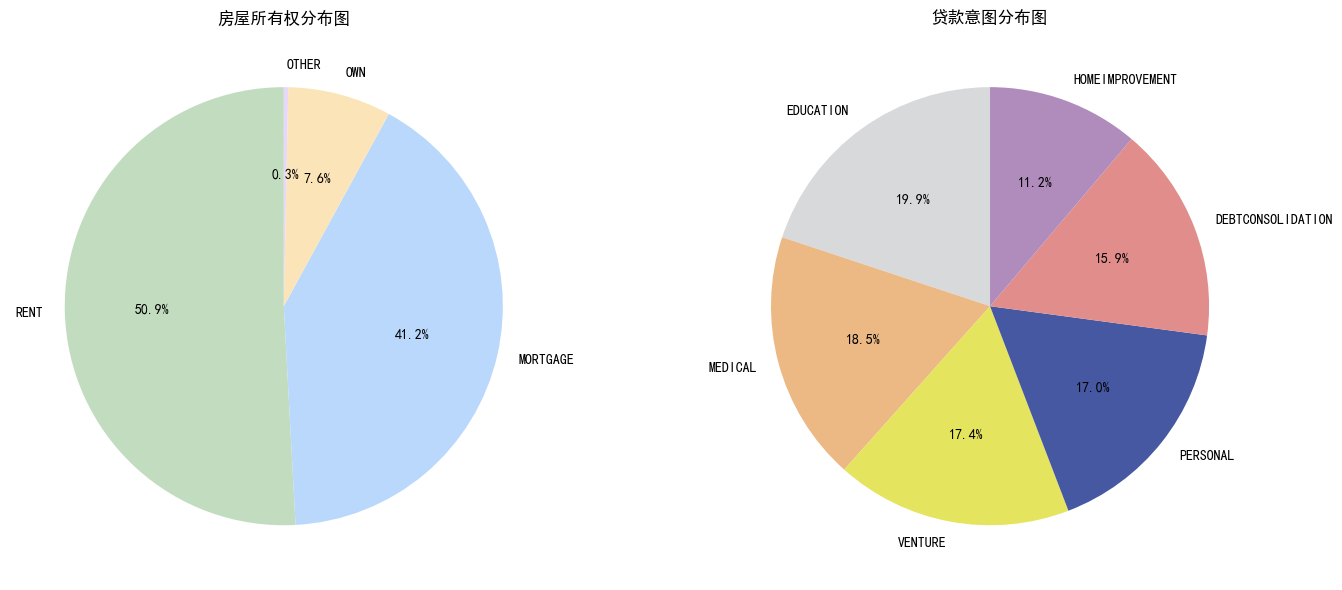

In [111]:
# 创建一个包含两个子图的图表
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1行2列

# 房屋所有权分布图配色
colors_home_ownership = ['#C2DCBF', '#BAD8FB', '#FBE5B8', '#E7D8FA']

# 贷款意图分布图配色
colors_loan_intent = ['#D8D9DA', '#ECB884', '#E4E45F', '#4758A2', '#E08D8B', '#AF8CBB']

# 第一个饼图：房屋所有权分布
home_ownership_counts = data['person_home_ownership'].value_counts()
axs[0].pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_home_ownership)
axs[0].set_title('房屋所有权分布图')

# 第二个饼图：贷款意图分布
loan_intent_counts = data['loan_intent'].value_counts()
axs[1].pie(loan_intent_counts, labels=loan_intent_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_loan_intent)
axs[1].set_title('贷款意图分布图')

# 调整子图间距
plt.tight_layout()
plt.show()

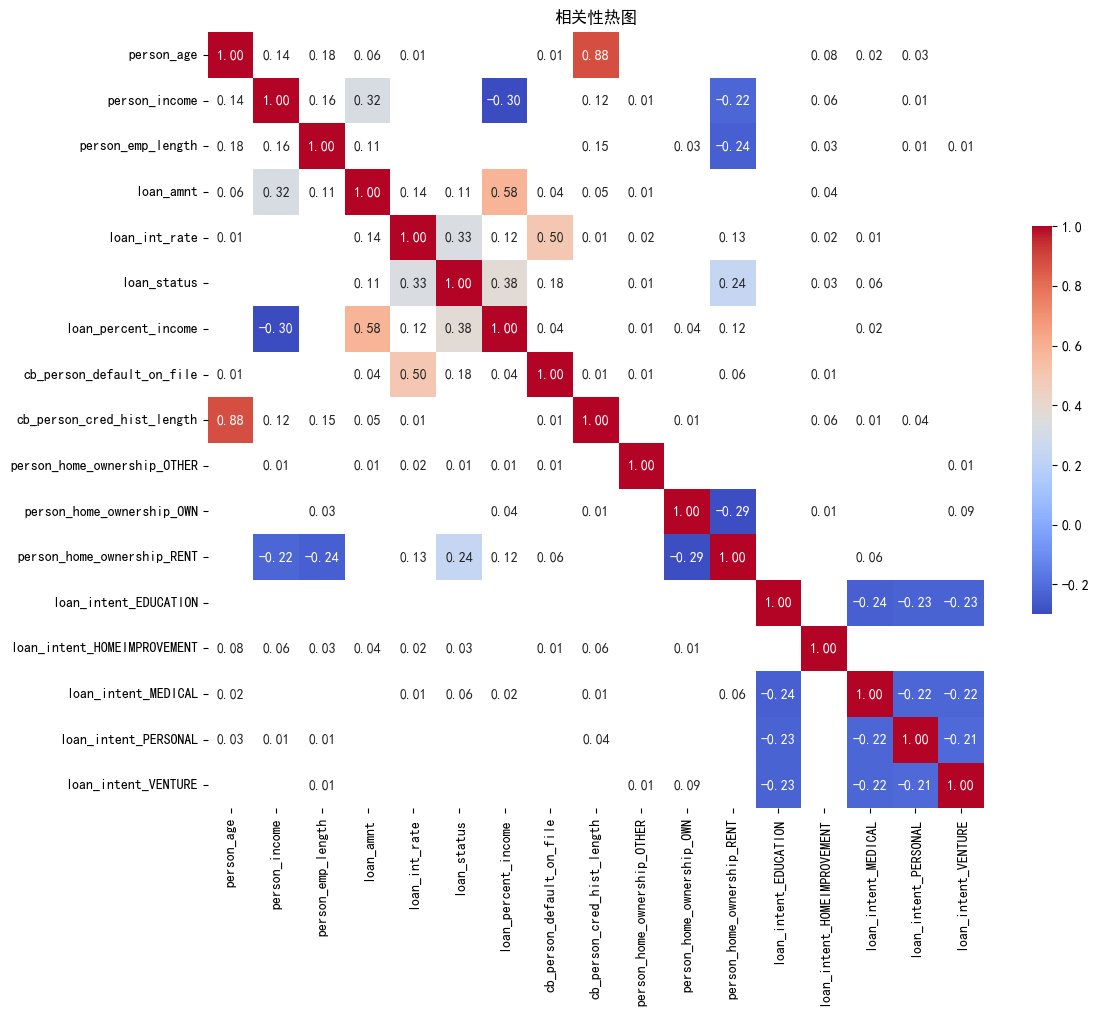

In [ ]:
#为更好地进行后续的数据分析，对类别型数据进行编码处理
# 进行 One-Hot 编码处理
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# 对 cb_person_default_on_file 进行 0-1 编码
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})


# 计算相关性矩阵
correlation_matrix = data.corr().round(2)

# 设置相关性阈值
threshold = 0.2

# 制作相关性热图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .5})

# 隐藏相关性绝对值小于阈值的元素
for i in range(len(correlation_matrix.columns)):
     for j in range(len(correlation_matrix.columns)):
         if abs(correlation_matrix.iloc[i, j]) < threshold and i != j:
             plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, facecolor='white', edgecolor='none'))

plt.title('相关性热图')
plt.tight_layout()
# 设置DPI
plt.savefig('相关性热图.png', dpi=800)
plt.show()



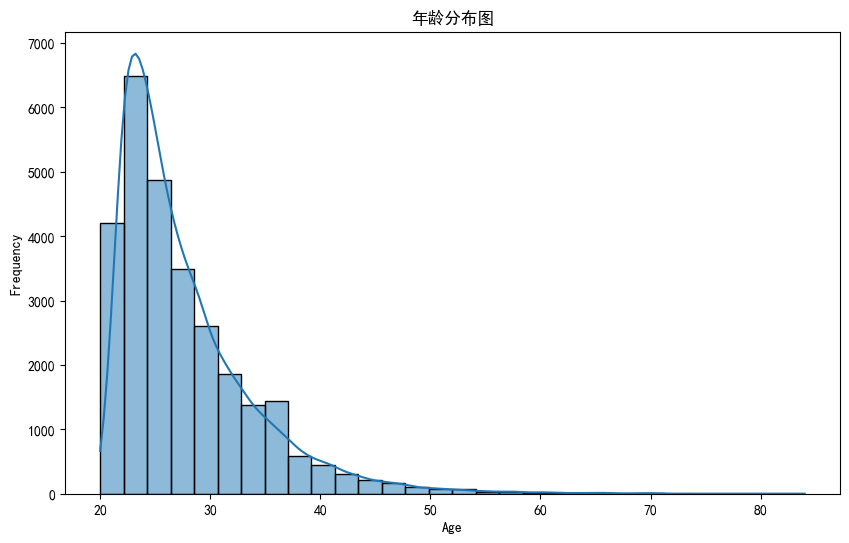

In [52]:
# 年龄分布图
plt.figure(figsize=(10, 6))
sns.histplot(data['person_age'], bins=30, kde=True)
plt.title('年龄分布图')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

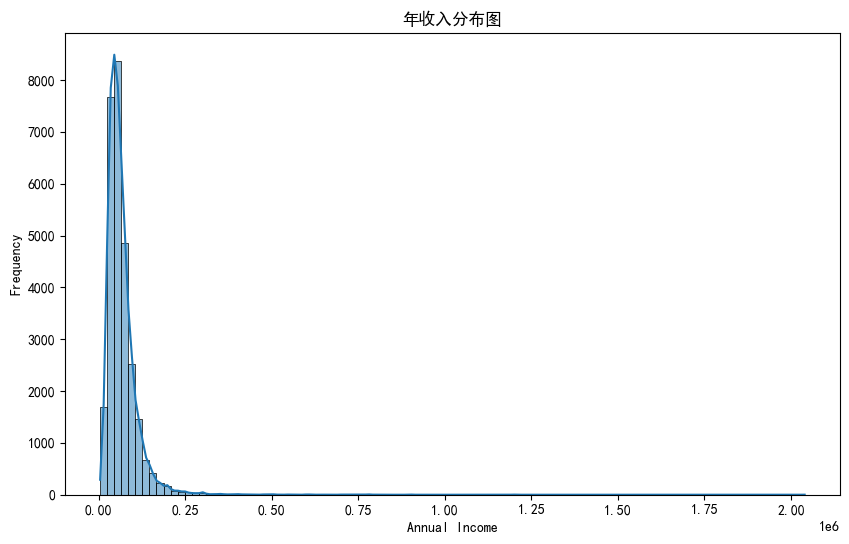

In [127]:
# 年收入分布图
plt.figure(figsize=(10, 6))
sns.histplot(data['person_income'], bins=100, kde=True)
plt.title('年收入分布图')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

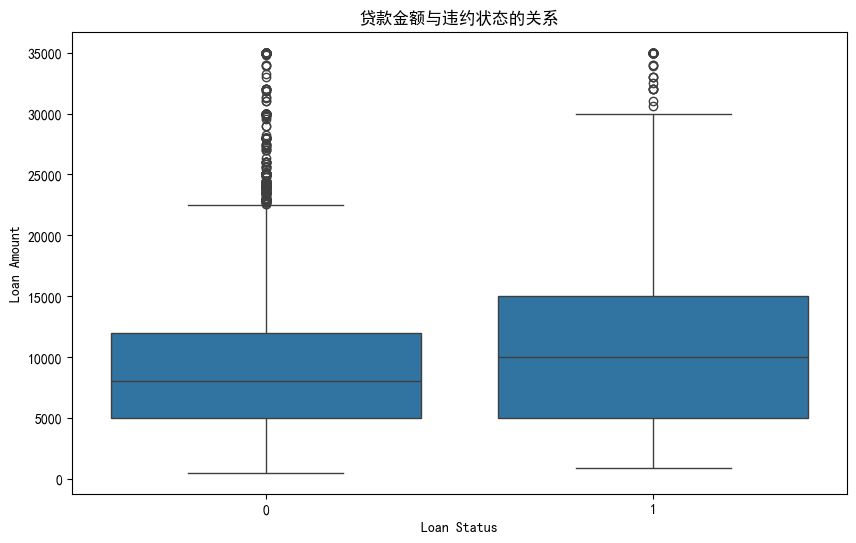

In [8]:
# 贷款金额与违约状态的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('贷款金额与违约状态的关系')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

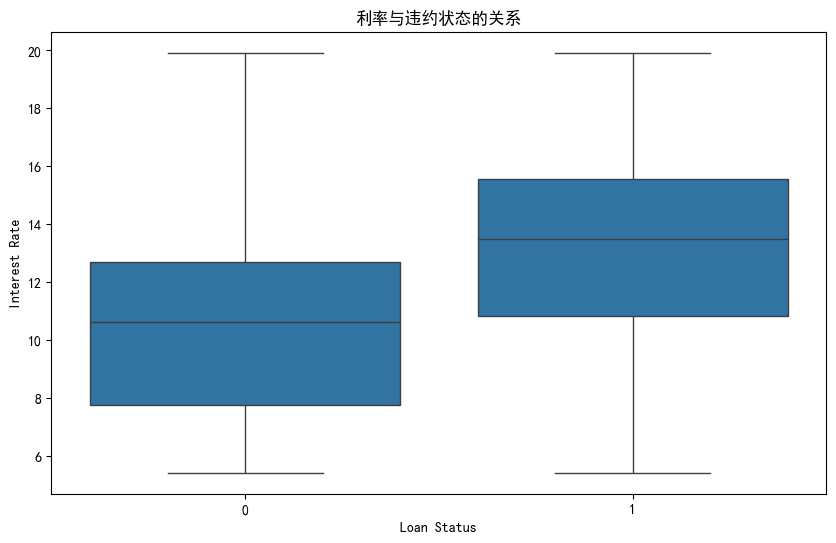

In [9]:
# 利率与违约状态的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=data)
plt.title('利率与违约状态的关系')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

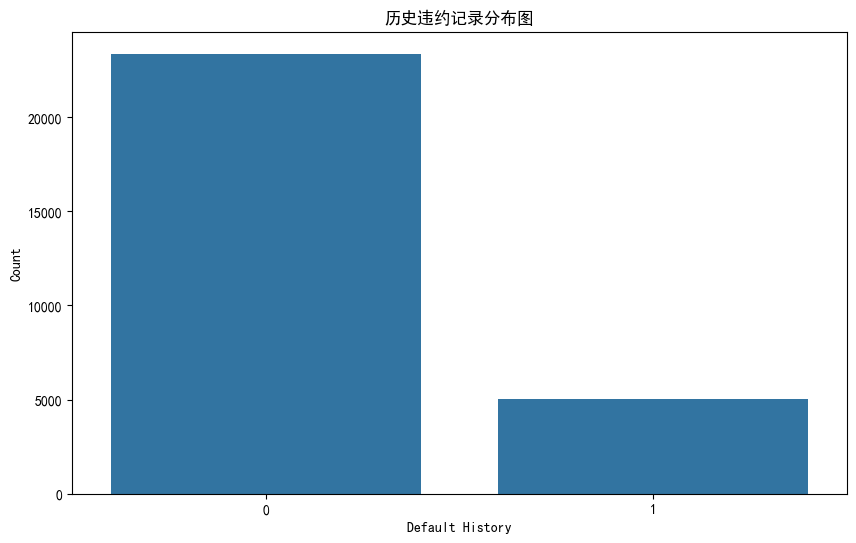

In [15]:
# 历史违约记录分布图
plt.figure(figsize=(10, 6))
sns.countplot(x='cb_person_default_on_file', data=data)
plt.title('历史违约记录分布图')
plt.xlabel('Default History')
plt.ylabel('Count')
plt.show()

#####     特征选择：训练随机森林模型来评估特征的重要性    #####

loan_percent_income            0.226287
loan_int_rate                  0.196107
person_income                  0.154766
loan_amnt                      0.082062
person_home_ownership_RENT     0.081471
person_emp_length              0.060721
person_age                     0.051849
cb_person_cred_hist_length     0.039669
cb_person_default_on_file      0.017967
loan_intent_HOMEIMPROVEMENT    0.017567
person_home_ownership_OWN      0.016004
loan_intent_MEDICAL            0.015269
loan_intent_EDUCATION          0.014677
loan_intent_PERSONAL           0.013041
loan_intent_VENTURE            0.011278
person_home_ownership_OTHER    0.001264
dtype: float64


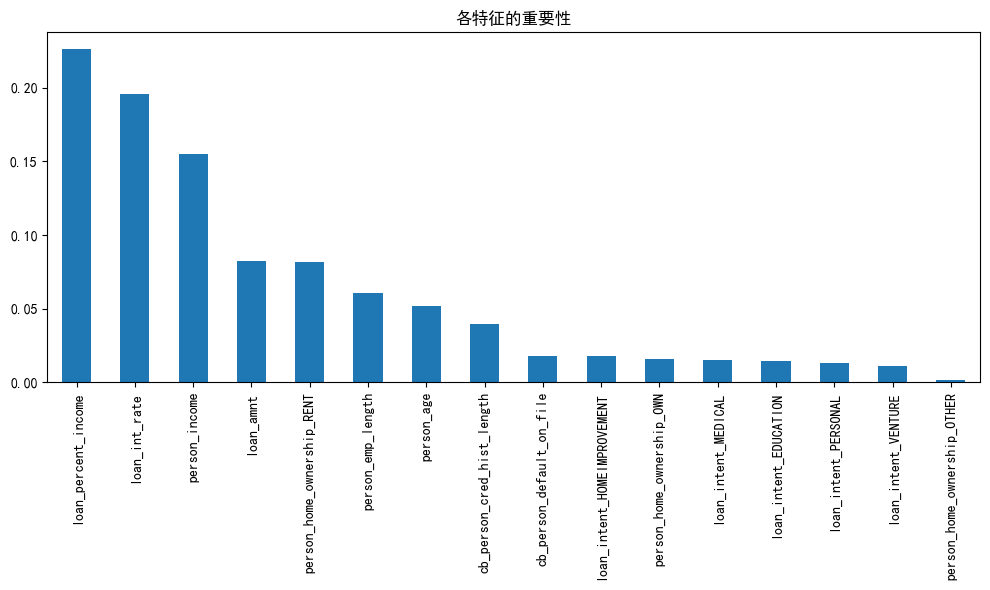

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('loan_status', axis=1)  # 特征
y = data['loan_status']  # 目标变量

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 获取特征重要性
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("各特征的重要性")
plt.tight_layout()
plt.savefig('特征重要性.png',dpi=800)
plt.show()

#####   利用随机森林模型的评价指标选择合适数量的特征变量   ####

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 获取特征重要性
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 定义一个函数来计算不同数量特征下的模型评价指标
def calculate_metrics(num_features):
    top_features = feature_importances.index[:num_features]
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]
    
    rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_selected.fit(X_train_selected, y_train)
    y_pred = rf_model_selected.predict(X_test_selected)
    
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
    }
    return metrics

# 存储每种情况下的评价指标
metrics_all = []
num_features_range = range(1, len(feature_importances) + 1)  # 特征数量选取范围：1~特征总数
for num_features in num_features_range:
    metrics = calculate_metrics(num_features)
    metrics_all.append(metrics)

Text(0, 0.5, 'F1 Score')

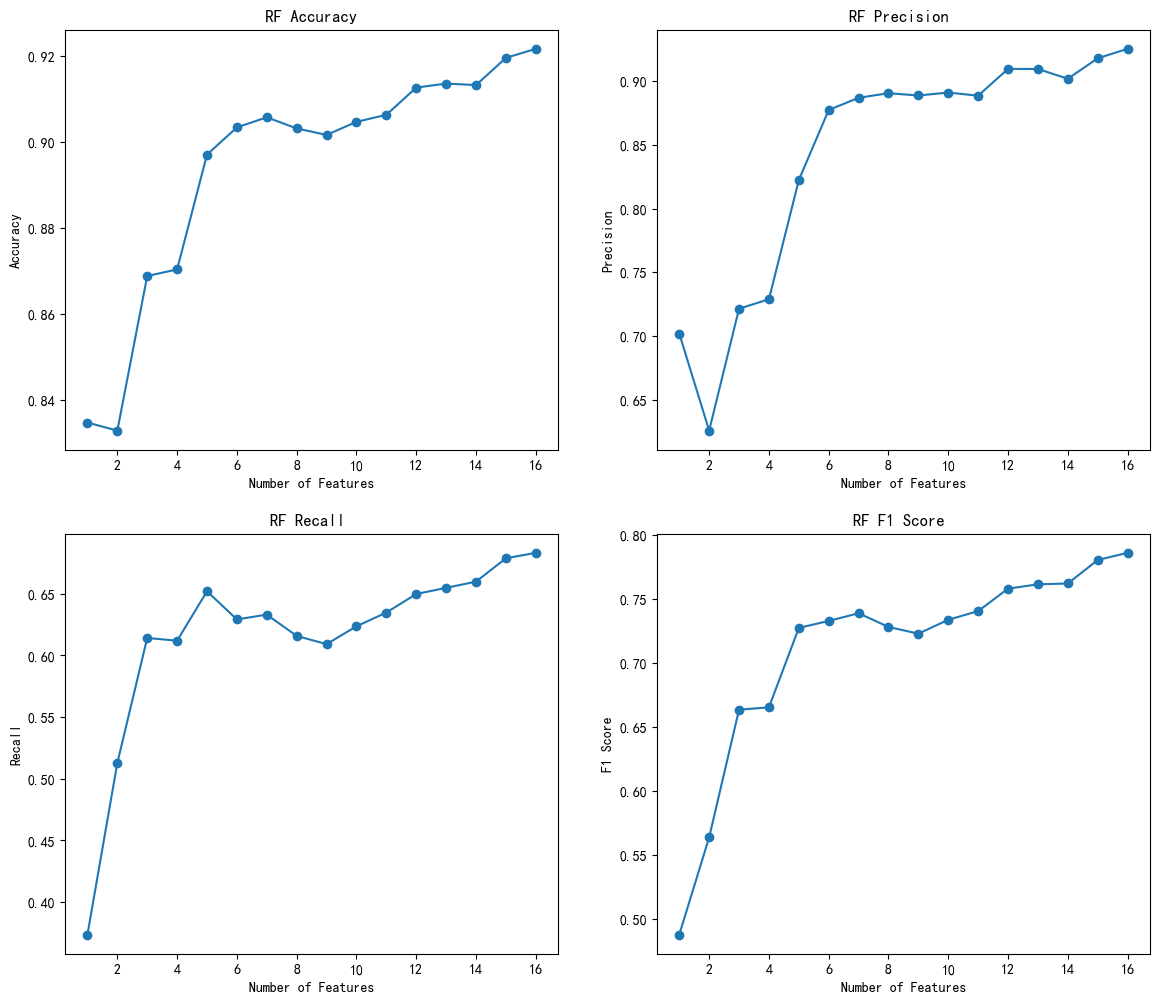

In [51]:
# 可视化不同数量特征下的评价指标
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs[0, 0].plot(num_features_range, [m['accuracy'] for m in metrics_all], marker='o')
axs[0, 0].set_title(' RF Accuracy ')
axs[0, 0].set_xlabel('Number of Features')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(num_features_range, [m['precision'] for m in metrics_all], marker='o')
axs[0, 1].set_title('RF Precision ')
axs[0, 1].set_xlabel('Number of Features')
axs[0, 1].set_ylabel('Precision')

axs[1, 0].plot(num_features_range, [m['recall'] for m in metrics_all], marker='o')
axs[1, 0].set_title('RF Recall ')
axs[1, 0].set_xlabel('Number of Features')
axs[1, 0].set_ylabel('Recall')

axs[1, 1].plot(num_features_range, [m['f1_score'] for m in metrics_all], marker='o')
axs[1, 1].set_title('RF F1 Score ')
axs[1, 1].set_xlabel('Number of Features')
axs[1, 1].set_ylabel('F1 Score')

#####   考虑到选择单个模型可能存在误差，接下来尝试用不同模型来进行预测，通过ROC曲线图进行对比分析    ####

In [91]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')


X = data.drop('loan_status', axis=1)  # 特征
y = data['loan_status']  # 目标变量

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义不同的模型
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    
}

# 存储每个模型的ROC AUC
roc_aucs = []

# 训练每个模型并计算ROC AUC
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append((name, fpr, tpr, roc_auc))


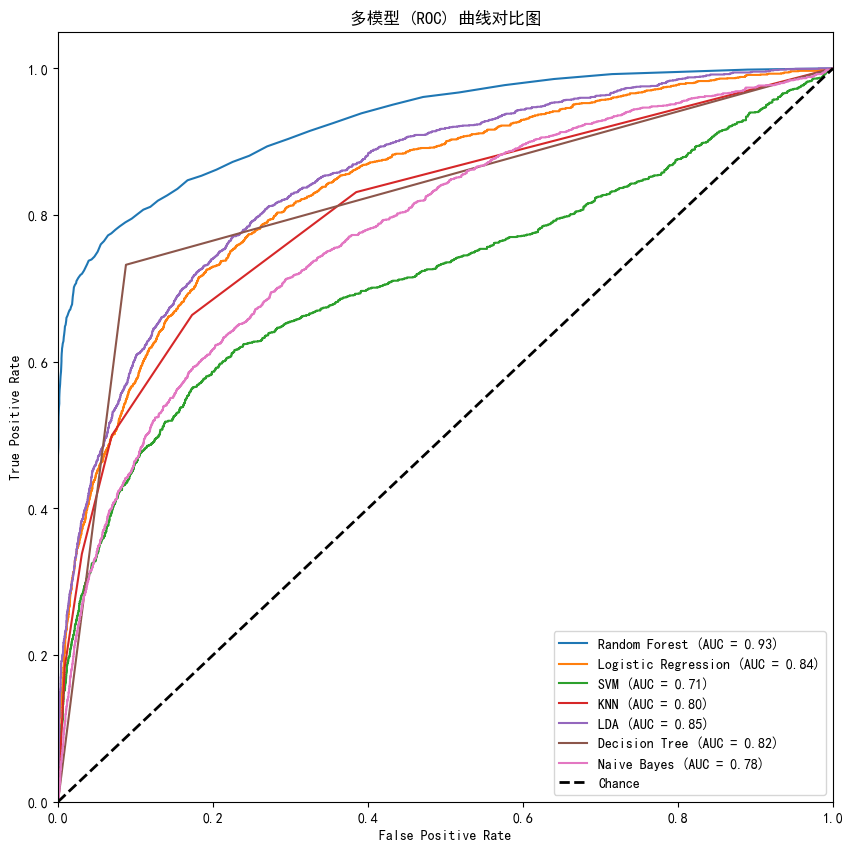

In [92]:
# 绘制ROC AUC曲线
plt.figure(figsize=(10, 10))
for name, fpr, tpr, roc_auc in roc_aucs:
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('多模型 (ROC) 曲线对比图')
plt.legend(loc="lower right")
plt.show()


####  分析上图（ROC-AUC曲线图），最终采取随机森林模型进行预测客户是否违约
####  从训练集和测试集的划分、模型参数优化来进一步优化模型   ####

##### 训练集测试集的划分 #####

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

X = data.drop('loan_status', axis=1)  # 特征
y = data['loan_status']  # 目标变量

# 不同的划分比例
test_sizes = [0.2, 0.3, 0.4]
accuracies = []
opt = 0
bst_size = 0.2

for test_size in test_sizes:
    # 拆分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # 训练随机森林模型
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    if accuracy > opt:
        opt = accuracy
        bst_size = test_size

print("最佳划分方法为（测试集比例）：", bst_size)
print("最佳划分方法准确率（ACC）：", opt)


最佳划分方法为（测试集比例）： 0.2
最佳划分方法准确率（ACC）： 0.926297273526825


##### 利用网格搜索进行参数优化  #####

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 超参数范围
n_estimators_options = [100, 200, 300]  # 森林中树的数量
max_depth_options = [10, 20, 50]  # 每棵树的最大深度
min_samples_split_options = [2, 5]  # 分裂节点的最小样本数
min_samples_leaf_options = [1, 2]  # 叶子节点的最小样本数

# 初始化变量记录最佳参数和最高准确率
best_params = {}
best_accuracy = 0

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 网格搜索
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for min_samples_split in min_samples_split_options:
            for min_samples_leaf in min_samples_leaf_options:
                # 定义模型
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                # 训练模型
                model.fit(X_train, y_train)
                
                # 计算训练集和测试集的准确率
                train_accuracy = accuracy_score(y_train, model.predict(X_train))
                test_accuracy = accuracy_score(y_test, model.predict(X_test))

                # 保存最佳结果
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }
                    best_train_accuracy = train_accuracy  # 保存最佳训练集准确率

# 输出最佳参数和对应准确率
print("最佳参数：", best_params)
print("最高训练集准确率：", best_train_accuracy)
print("最高测试集准确率：", best_accuracy)

# 检查过拟合情况
if best_train_accuracy - best_accuracy > 0.05:  # 设定阈值为0.05
    print("模型可能存在过拟合。")
else:
    print("模型没有明显的过拟合。")

最佳参数： {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}
最高训练集准确率： 0.9652548709152483
最高测试集准确率： 0.9270008795074758
模型没有明显的过拟合。
